In [1]:
# importing the libraries
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1) Data Analysis 

In [2]:
# importing the dataset
dataset = pd.read_csv("heart.csv")

# shape of the data
print("shape of the dataset : ", dataset.shape)

# info of the data
print("Total memory usage of the dataset : ",
      dataset.info(memory_usage = "deep" , verbose = False))

# keys of the data
print("Columns of the dataset : ", dataset.columns)

shape of the dataset :  (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Columns: 14 entries, age to target
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Total memory usage of the dataset :  None
Columns of the dataset :  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


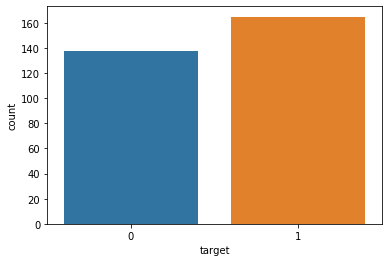

In [3]:
# dataset
sns.countplot(dataset["target"])
dataset.head(8)


* Thus, the dataset is a balanced dataset

In [4]:
## statistical summuray of the data set
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# function which checks for the null values 

def check_null(dataset):
    null_per = (dataset.isnull().sum() / len(dataset)) * 100
    
    try:
        # dropping round null where null == 0
        null_per = round(null_per.drop(null_per[null_per == 0].index)).sort_values(ascending = False)
        
        # making the bar plot of the null per
        plt.figure(figsize = (12,8))
        null_per_plot = sns.barplot(x = null_per.index , y = null_per)
        plt.xticks(rotation = "90")
        plt.title("Percentage of the null values in the dataset")
        plt.show()
        
    except:
        print("There is NO null values in the dataset")
        print("Returning the Dataset......")
        return dataset
    
    return null_per_plot

check_null(dataset)

There is NO null values in the dataset
Returning the Dataset......


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Figure size 864x576 with 0 Axes>

### 2) Feature Engineering

In [6]:
## function which check for the outliers  from the numerical dataset 
# and remove it / fill it with the median fo the series

def remove_outliers(dataset):
    for i in dataset.describe().columns:
        q1 = dataset.describe().at["25%" , i]
        q3 = dataset.describe().at["75%" , i]
        iqr = q3 - q1
        
        lower_bound = q1 - (1.5*iqr)
        upper_bound = q3 + (1.5*iqr)
        
        x = np.array(dataset[i])
        p = []
        
        for j in x:
            if j < lower_bound or j > upper_bound:
                p.append(dataset[i].median())
            else:
                p.append(j)
                
        dataset[i] = p
        
    return dataset

# removing outliers with my fucuntion
#dataset = remove_outliers(dataset)

dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


* Now all the the outliers are removed by their midian

In [7]:
# creating the dummy variables
a = pd.get_dummies(dataset["cp"], prefix = "cp" , drop_first= True)
b = pd.get_dummies(dataset["thal"], prefix = "thal" , drop_first= True)
c = pd.get_dummies(dataset["slope"], prefix = "slope", drop_first= True)

# makiimg the df of dummy variables
frames = [dataset, a, b, c]
dataset = pd.concat(frames, axis = 1)

# dropping the columns
dataset = dataset.drop(columns = ['cp', 'thal', 'slope'], axis = 1)
dataset.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


In [8]:
# splitting the dataset into independent(x) and dependent features(y)
x = dataset.iloc[: , :-1].values
y = dataset.iloc[:, -1].values

# printing the types of x and y
print("Type of our Independent Features : " , type(x))
print("Type of our Dependent Features : ", type(y))

# printing the shape of x and y
print("Shape of our Indedepent Features :  ", x.shape) 
print("Shape of our Dependent Features : " , y.shape)

# checking the number of classes in our Target feature
print("Number of classes in Dependent Feature : ", np.unique(y))
print("Number of instances of class 0 : ", (y == 0).sum())
print("Number of instances of class 1 : ", (y == 1).sum())

Type of our Independent Features :  <class 'numpy.ndarray'>
Type of our Dependent Features :  <class 'numpy.ndarray'>
Shape of our Indedepent Features :   (303, 18)
Shape of our Dependent Features :  (303,)
Number of classes in Dependent Feature :  [0 1]
Number of instances of class 0 :  161
Number of instances of class 1 :  142


In [9]:
## feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
print(x)

[[ 0.9521966   0.68100522  0.76395577 ... -1.10076284 -0.79311554
  -0.92676626]
 [-1.91531289  0.68100522 -0.09273778 ...  0.9084609  -0.79311554
  -0.92676626]
 [-1.47415758 -1.46841752 -0.09273778 ...  0.9084609  -0.79311554
  -0.92676626]
 ...
 [ 1.50364073  0.68100522  0.70684287 ... -1.10076284  1.26085034
   1.07902072]
 [ 0.29046364  0.68100522 -0.09273778 ... -1.10076284  1.26085034
   1.07902072]
 [ 0.29046364 -1.46841752 -0.09273778 ...  0.9084609  -0.79311554
   1.07902072]]


### 3) Model Preparation

In [10]:
# splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2, random_state = 32)

print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[-1.47415758 -1.46841752 -0.3211894  ...  0.9084609  -0.79311554
  -0.92676626]
 [ 0.40075247  0.68100522 -1.80612489 ... -1.10076284  1.26085034
  -0.92676626]
 [-0.04040284  0.68100522 -0.54964101 ...  0.9084609  -0.79311554
   1.07902072]
 ...
 [-0.04040284 -1.46841752 -1.23499586 ...  0.9084609  -0.79311554
   1.07902072]
 [-0.15069166 -1.46841752 -0.09273778 ...  0.9084609  -0.79311554
   1.07902072]
 [-1.25357993 -1.46841752  0.02148802 ... -1.10076284  1.26085034
   1.07902072]]
[[ 0.29046364  0.68100522  0.02148802 ... -1.10076284  1.26085034
  -0.92676626]
 [ 0.5110413   0.68100522  1.84910094 ... -1.10076284 -0.79311554
   1.07902072]
 [ 1.61392956 -1.46841752  0.47839125 ...  0.9084609  -0.79311554
  -0.92676626]
 ...
 [-0.81242462  0.68100522 -1.23499586 ...  0.9084609  -0.79311554
   1.07902072]
 [-0.7021358  -1.46841752 -0.09273778 ...  0.9084609  -0.79311554
  -0.92676626]
 [-0.26098049  0.68100522 -0.66386682 ...  0.9084609  -0.79311554
  -0.92676626]]
[1 1 0 0 0 0 1 0

In [20]:
## function for checking
def metric(y_test, y_preg):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    #from sklearn.metrics import roc_curve
    
    cm = confusion_matrix(y_test , y_preg )
    report = classification_report(y_test, y_preg)
    
    # defining the confusion metrim visualization
    sns.set(font_scale=1.4)  
    cm_plot = sns.heatmap(cm , annot=True , cmap = "Blues"  , fmt= "g", 
                        linewidths = 1, annot_kws= {"size" : 16})
    
    # defining the ROC curve
    
    print(report)
    return cm_plot

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        34
           1       0.84      1.00      0.92        27

    accuracy                           0.92        61
   macro avg       0.92      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61



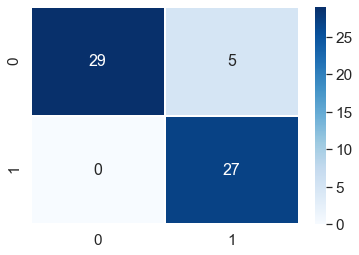

In [12]:
def support_vectors(x_train , y_train, x_test , y_test):
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import cross_val_predict
    classifier = SVC()
    
    param_grid = {"C": [0.1, 1, 10, 100, 1000],  
              "gamma": [1, 0.1, 0.01, 0.001, 0.0001], 
              "kernel" : ["rbf"]}  
    grid = GridSearchCV(classifier, param_grid , cv= 5 ) 
    
    grid.fit(x_train , y_train)
    y_preg = grid.predict(x_test)
    
    result = metric(y_test,y_preg)
    
    
support_vectors(x_train , y_train, x_test , y_test)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        34
           1       0.87      1.00      0.93        27

    accuracy                           0.93        61
   macro avg       0.94      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



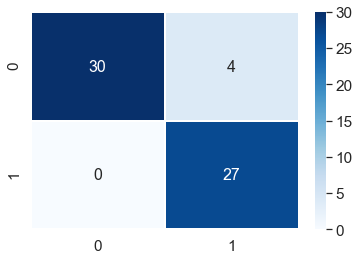

In [13]:
def logistic_regression(x_train, x_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import GridSearchCV
    classifier = LogisticRegression()
    
    para = {"penalty": ["l1","l2"], 
            "C": [0.001,0.01,0.1,1,10,100,1000]}
    
    grid = GridSearchCV(classifier, para, cv = 5)
    
    grid.fit(x_train , y_train)
    y_preg = grid.predict(x_test)
    
    result = metric(y_test,y_preg)

logistic_regression(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        34
           1       0.83      0.93      0.88        27

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



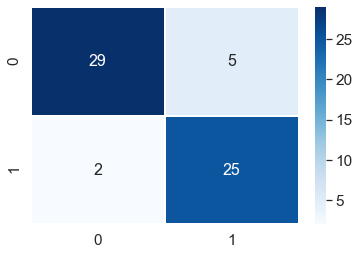

In [14]:
def decision_tree(x_train, x_test, y_train, y_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import GridSearchCV
    classifier = DecisionTreeClassifier()
    
    para = {"criterion" : ["gini","entropy"],
            "max_depth" : [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
    
    grid = GridSearchCV(classifier, para, cv=5)
    grid.fit(x_train , y_train)
    y_preg = grid.predict(x_test)
    
    result = metric(y_test,y_preg)
    
decision_tree(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        34
           1       0.84      1.00      0.92        27

    accuracy                           0.92        61
   macro avg       0.92      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61



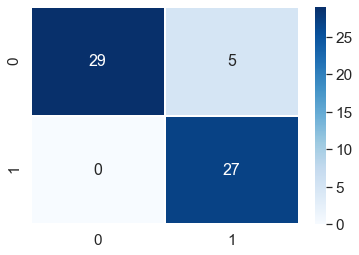

In [15]:
def forest(x_train, x_test, y_train, y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import GridSearchCV
    
    classifier = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=3,
                min_samples_split=2)
    
    para = {"n_estimators" : [5,10,15],
            "max_features" : ["auto", "sqrt", "log2"],
               "max_depth" : [3,4,5],
               "criterion" :["gini", "entropy"]}
    
    grid = GridSearchCV(estimator= classifier, param_grid = para, cv = 5)
    grid.fit(x_train, y_train)
    
    
    y_preg = grid.predict(x_test)
    
    result = metric(y_test,y_preg)
    
forest(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        34
           1       0.82      1.00      0.90        27

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



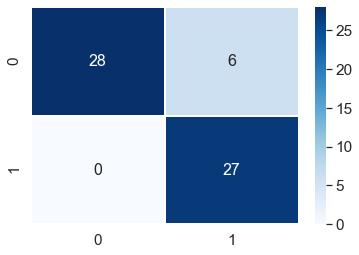

In [16]:
def naive_bayes(x_train, x_test, y_train, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV
    
    classifier = GaussianNB()
    
    classifier.fit(x_train, y_train)
    y_preg = classifier.predict(x_test)
    
    result = metric(y_test,y_preg)

naive_bayes(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.90      1.00      0.95        27

    accuracy                           0.95        61
   macro avg       0.95      0.96      0.95        61
weighted avg       0.96      0.95      0.95        61



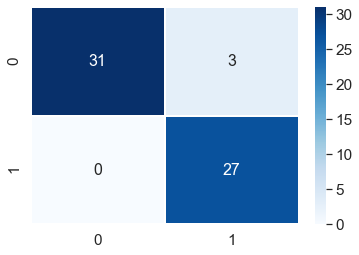

In [19]:
def XGBoost(x_train, x_test, y_train, y_test):
    from xgboost import XGBClassifier
    from sklearn.model_selection import GridSearchCV
    
    classifier = XGBClassifier(learning_rate=0.02, n_estimators=5) 
                               
                               
    
    #para = {"min_child_weight": [1, 5, 10],
     #       "gamma": [0.5, 1, 1.5, 2, 5],
      #      "subsample": [0.6, 0.8, 1.0],
       #     "colsample_bytree": [0.6, 0.8, 1.0],
        #    "max_depth": [3, 4, 5]}
    
    #grid = GridSearchCV(classifier , para , cv = 5) 
    
    classifier.fit(x_train, y_train)
    y_preg = classifier.predict(x_test)
    
    result = metric(y_test,y_preg)

XGBoost(x_train, x_test, y_train, y_test)